<a href="https://colab.research.google.com/github/elixir-biohackathon-project-12/network-analysis/blob/main/age_differences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [211]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [219]:
import numpy as np
from datetime import datetime, timedelta, date
import matplotlib
import matplotlib.pyplot as plt
import math 
import statistics
import scipy
import scipy.stats
matplotlib.rcParams['image.cmap'] = 'viridis'


In [191]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [113]:
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%dT%H:%M:%SZ")
    d2 = datetime.strptime(d2, "%Y-%m-%dT%H:%M:%SZ")
    return abs((d2 - d1).days)

In [114]:
import io
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving collectors_info.csv to collectors_info (1).csv
Saving selected.csv to selected (1).csv


In [115]:
nodes = pd.read_csv(io.BytesIO(uploaded['collectors_info.csv']), header=None, names = ['wdid', 'namestr', 'gender', 'CC', 'BD', 'DD'])
edges = pd.read_csv(io.BytesIO(uploaded['selected.csv']))

nodes.head()

,wdid,namestr,gender,CC,BD,DD
0,http://www.wikidata.org/entity/Q100156193,Laurence Henry Millener,male,New Zealand,1914-04-01T00:00:00Z,2000-01-01T00:00:00Z
1,http://www.wikidata.org/entity/Q100156193,Laurence Henry Millener,male,New Zealand,1914-04-01T00:00:00Z,2000-01-01T00:00:00Z
2,http://www.wikidata.org/entity/Q100157099,Ross Henry Michie,male,New Zealand,1894-01-01T00:00:00Z,1987-01-01T00:00:00Z
3,http://www.wikidata.org/entity/Q100587885,Myrtle L. T. Adams,female,United States of America,1903-12-13T00:00:00Z,1989-02-16T00:00:00Z
4,http://www.wikidata.org/entity/Q100600540,Hubert Walter Simmonds,unknown,unknown,1877-01-01T00:00:00Z,1966-03-16T00:00:00Z


## calculate ages

In [116]:
nodes.BD = nodes.BD.replace('S.D.', '4000-01-01T00:00:00Z')
nodes.DD = nodes.DD.replace('S.D.', '4000-01-01T00:00:00Z')

In [117]:
nodes.BD

0       1914-04-01T00:00:00Z
1       1914-04-01T00:00:00Z
2       1894-01-01T00:00:00Z
3       1903-12-13T00:00:00Z
4       1877-01-01T00:00:00Z
                ...         
3005    4000-01-01T00:00:00Z
3006    4000-01-01T00:00:00Z
3007    4000-01-01T00:00:00Z
3008    4000-01-01T00:00:00Z
3009    4000-01-01T00:00:00Z
Name: BD, Length: 3010, dtype: object

In [118]:
ages = []
for index,row in nodes.iterrows():
  try:
    ages.append(days_between(row['DD'], row['BD']))
  except ValueError:
    ages.append(np.NaN)

nodes['age'] = ages

In [119]:
edges_unique.head()

,person1,person2
0,https://orcid.org/0000-0002-7053-8557,https://orcid.org/0000-0002-7991-6593
1,https://orcid.org/0000-0002-7053-8557,https://orcid.org/0000-0003-1790-4332
280,https://orcid.org/0000-0002-7053-8557,https://orcid.org/0000-0002-1768-2891
2293,https://orcid.org/0000-0002-7053-8557,http://www.wikidata.org/entity/Q26714160
2759,https://orcid.org/0000-0003-3580-6808,https://orcid.org/0000-0002-3093-1258


## calculate age differences

In [120]:
gender_1 = []
gender_2 = []
agediff = []
age_p1 = []
age_p2 = []
id1 = []
id2 = []
# 0:unknown, 1:female-female, 2: male-male, 3:mixed
gender_diff = []

print(len(edges))
edges_unique = pd.DataFrame.drop_duplicates(edges)
print(edges_unique.head())


for index, row in edges_unique.iterrows():
  id1.append(row['person1'])
  id2.append(row['person2'])
  gen1 = nodes.loc[nodes.wdid == row['person1']]['gender'].values[0]
  gen2 = nodes.loc[nodes.wdid == row['person2']]['gender'].values[0]
  gender_1.append(gen1)
  gender_2.append(gen2)
  if gen1 == gen2:
    if gen1 == 'male':
      gender_diff.append('m-m')
    elif gen1 == 'female':
      gender_diff.append('f-f')
    else:
      gender_diff.append('unknown')
  elif gen1 == 'unknown' or gen2 =='unknown':
    gender_diff.append('unknown')
  else:
    gender_diff.append('mixed')

  try:
    age1 = nodes.loc[nodes.wdid == row['person1']]['BD']
    age1 = age1.values[0]
    age_p1.append(age1)
    age2 = nodes.loc[nodes.wdid == row['person2']]['BD']
    age2 = age2.values[0]
    age_p2.append(age2)
    agediff.append(abs(days_between(age2,age1))/365)
  except IndexError:
    agediff.append(np.NaN)

print(len(agediff))

1184652
                                    person1                                   person2
0     https://orcid.org/0000-0002-7053-8557     https://orcid.org/0000-0002-7991-6593
1     https://orcid.org/0000-0002-7053-8557     https://orcid.org/0000-0003-1790-4332
280   https://orcid.org/0000-0002-7053-8557     https://orcid.org/0000-0002-1768-2891
2293  https://orcid.org/0000-0002-7053-8557  http://www.wikidata.org/entity/Q26714160
2759  https://orcid.org/0000-0003-3580-6808     https://orcid.org/0000-0002-3093-1258
8660


In [121]:
results = pd.DataFrame(list(zip(gender_1, gender_2, age_p1, age_p2, agediff, gender_diff, id1, id2)),
               columns =['gen1', 'gen2', 'bd1', 'bd2', 'agediff', 'genderdiff', 'id1', 'id2'])

(array([386., 416., 410., 384., 318., 344., 290., 270., 304., 238., 256.,
        232., 252., 230., 200., 244., 202., 160., 180., 186., 138., 172.,
        124., 108., 126., 112.,  96., 106., 106.,  94.,  74.,  58.,  74.,
         68.,  56.,  60.,  44.,  40.,  32.,  30.,  24.,  28.,  20.,  26.,
          8.,  12.,  12.,   8.,  14.,  18.,  18.,  18.,  14.,  14.,   8.,
          8.,  10.,   8.,  12.,   6.,   6.,  10.,   2.,   0.,   2.,   6.,
          4.,   6.,   2.,   4.,   2.,   8.,   6.,   4.,   6.,   4.,   4.,
          4.,  16.,   6.,   4.,   8.,   0.,   2.,   6.,   0.,   2.,   4.,
          2.,   2.,   2.,   2.,   2.,   6.,   2.,   8.,   4.,   2.,   2.,
          4.,   0.,   0.,   2.,   2.,   4.,   4.,   4.,   0.,   4.,   4.,
          2.,   0.,   0.,   2.,   2.,   2.,   2.,   4.,   2.,   0.,   0.,
          0.,   0.,   2.,   2.,   0.,   2.,   8.,   4.,   0.,   0.,   0.,
          2.,   2.,   0.,   0.,   0.,   4.,   2.,   4.,   0.,   2.,   0.,
          2.,   2.,   2.,   0.,   0., 

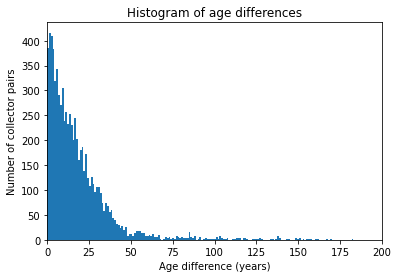

In [122]:
agediff = [i for i in agediff if i != 0]
agediff = [i for i in agediff if i < 1000]

agediff
plt.xlabel('Age difference (years)')
plt.ylabel('Number of collector pairs')
plt.xlim(0, 200)
plt.title('Histogram of age differences')
plt.hist(agediff, bins=200)

In [123]:
print(len(agediff))
print(len(gender_1))

7764
8660


In [124]:
results

,gen1,gen2,bd1,bd2,agediff,genderdiff,id1,id2
0,male,unknown,4000-01-01T00:00:00Z,4000-01-01T00:00:00Z,0.000000,unknown,https://orcid.org/0000-0002-7053-8557,https://orcid.org/0000-0002-7991-6593
1,male,male,4000-01-01T00:00:00Z,1978-01-01T00:00:00Z,2023.342466,m-m,https://orcid.org/0000-0002-7053-8557,https://orcid.org/0000-0003-1790-4332
2,male,unknown,4000-01-01T00:00:00Z,4000-01-01T00:00:00Z,0.000000,unknown,https://orcid.org/0000-0002-7053-8557,https://orcid.org/0000-0002-1768-2891
3,male,female,4000-01-01T00:00:00Z,1960-03-22T00:00:00Z,2041.134247,mixed,https://orcid.org/0000-0002-7053-8557,http://www.wikidata.org/entity/Q26714160
4,unknown,male,4000-01-01T00:00:00Z,1966-11-18T00:00:00Z,2034.471233,unknown,https://orcid.org/0000-0003-3580-6808,https://orcid.org/0000-0002-3093-1258
...,...,...,...,...,...,...,...,...
8655,male,male,1871-12-20T00:00:00Z,1886-06-18T00:00:00Z,14.504110,m-m,http://www.wikidata.org/entity/Q5622052,http://www.wikidata.org/entity/Q34558
8656,male,male,1925-01-01T00:00:00Z,1893-01-01T00:00:00Z,32.019178,m-m,http://www.wikidata.org/entity/Q12736603,http://www.wikidata.org/entity/Q12729092
8657,male,male,1869-04-15T00:00:00Z,1749-10-10T00:00:00Z,119.591781,m-m,http://www.wikidata.org/entity/Q4993340,http://www.wikidata.org/entity/Q353283
8658,unknown,unknown,4000-01-01T00:00:00Z,4000-01-01T00:00:00Z,0.000000,unknown,https://orcid.org/0000-0002-2930-9031,https://orcid.org/0000-0002-7686-8610


In [125]:
results.drop(results[results.agediff == 0].index, inplace=True)
results.drop(results[results.agediff  > 1000].index, inplace=True)

18.432736332746096
19.70859846811018
14.42588568729334
348


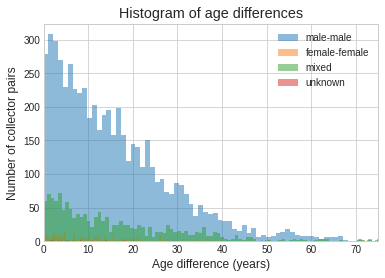

In [239]:
mm = results.loc[results['genderdiff'] == 'm-m']
ff = results.loc[results['genderdiff'] == 'f-f']
mix = results.loc[results['genderdiff'] == 'mixed']
unkn = results.loc[results['genderdiff'] == 'unknown']

mean_mm = statistics.mean(mm.agediff)
mean_mix = statistics.mean(mix.agediff)
mean_ff = statistics.mean(ff.agediff)
print(mean_mm)
print(mean_mix)
print(mean_ff)
print(len(ff))


plt.xlabel('Age difference (years)')
plt.ylabel('Number of collector pairs')
plt.xlim(0, 75)
plt.title('Histogram of age differences')
_, mmbins, _ = plt.hist(mm.agediff, bins=200, alpha=0.5, label = 'male-male')
_, ffbins, _ = plt.hist(ff.agediff, bins=200, alpha=0.5, label = 'female-female')
_, mixbins, _ = plt.hist(mix.agediff, bins=200, alpha=0.5, label = 'mixed')
plt.hist(unkn.agediff, bins=200, alpha=0.5, label = 'unknown')
plt.legend(loc='upper right')
plt.show()

In [175]:
mean, var, skew, kurt = scipy.stats.invgamma.stats(mm.agediff, moments='mvsk')
print(mean)

[0.02388587 0.04602774 0.01281241 ... 0.03223812 0.00843229 0.00602022]


Mean male-male  14.711149830914437
Median male-male  12.36986301369863
Mean female-female  13.151974214343271
Median female-female  11.219178082191782
Mean mix  14.606623643993982
Median mix  11.508219178082191


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


{'boxes': [<matplotlib.lines.Line2D at 0x7fd60b5ace50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd60afebad0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd61bddc610>,
 'means': [<matplotlib.lines.Line2D at 0x7fd60ad15c50>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd60ad15610>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd60b5acd10>,
  <matplotlib.lines.Line2D at 0x7fd60aab51d0>]}

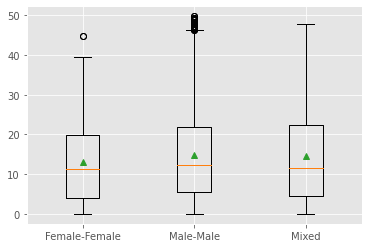

In [207]:
mm_filtered = [i for i in mm.agediff if i < 50]
ff_filtered = [i for i in ff.agediff if i < 50]
mix_filtered = [i for i in mix.agediff if i < 50]

print('Mean male-male  ' + str(statistics.mean(mm_filtered)))
print('Median male-male  ' + str(statistics.median(mm_filtered)))
print('Mean female-female  ' + str(statistics.mean(ff_filtered)))
print('Median female-female  ' + str(statistics.median(ff_filtered)))
print('Mean mix  ' + str(statistics.mean(mix_filtered)))
print('Median mix  ' + str(statistics.median(mix_filtered)))
x = ['Female-Female', 'Male-Male', 'Mixed']
plt.boxplot([ff_filtered, mm_filtered, mix_filtered], labels=x, showmeans=True)

In [208]:
T1 = [datetime(1600, 1, 1), datetime(1699, 12, 31)]
T2 = [datetime(1700, 1, 1), datetime(1799, 12, 31)]
T3 = [datetime(1800, 1, 1), datetime(1899, 12, 31)]
T4 = [datetime(1900, 1, 1), datetime(1999, 12, 31)]
T5 = [datetime(2000, 1, 1), datetime(2099, 12, 31)]

## checking ratios according to time period

In [129]:
r_mm = [0, 0, 0, 0, 0]
r_ff = [0, 0, 0, 0, 0]
r_mixed = [0, 0, 0, 0, 0]
total = [0, 0, 0, 0, 0]

for index,row in results.iterrows():
  bd1 = datetime.strptime(row['bd1'], "%Y-%m-%dT%H:%M:%SZ")
  if bd1 > T1[0] and bd1 < T1[1]:
    if row['genderdiff'] == 'm-m':
      r_mm[0] += 1
      total[0] += 1
    elif row['genderdiff'] == 'f-f':
      r_ff[0] += 1
      total[0] += 1
    elif row['genderdiff'] == 'mixed':
      r_mixed[0] += 1
      total[0] += 1
  
  if bd1 > T2[0] and bd1 < T2[1]:
    if row['genderdiff'] == 'm-m':
      r_mm[1] += 1
      total[1] += 1
    elif row['genderdiff'] == 'f-f':
      r_ff[1] += 1
      total[1] += 1
    elif row['genderdiff'] == 'mixed':
      r_mixed[1] += 1
      total[1] += 1
  
  if bd1 > T3[0] and bd1 < T3[1]:
    if row['genderdiff'] == 'm-m':
      r_mm[2] += 1
      total[2] += 1
    elif row['genderdiff'] == 'f-f':
      r_ff[2] += 1
      total[2] += 1
    elif row['genderdiff'] == 'mixed':
      r_mixed[2] += 1
      total[2] += 1
  
  if bd1 > T4[0] and bd1 < T4[1]:
    if row['genderdiff'] == 'm-m':
      r_mm[3] += 1
      total[3] += 1
    elif row['genderdiff'] == 'f-f':
      r_ff[3] += 1
      total[3] += 1
    elif row['genderdiff'] == 'mixed':
      r_mixed[3] += 1
      total[3] += 1

    if bd1 > T5[0] and bd1 < T5[1]:
      if row['genderdiff'] == 'm-m':
        r_mm[4] += 1
        total[4] += 1
      elif row['genderdiff'] == 'f-f':
        r_ff[4] += 1
        total[4] += 1
      elif row['genderdiff'] == 'mixed':
        r_mixed[4] += 1
        total[4] += 1


In [130]:
len(results)

7764

In [234]:
x = ['17th', '18th', '19th', '20th']
ratio_mmff = [int(b) / int(m) * 100 for b,m in zip(r_ff[0:4], r_mm[0:4])]
mm_s = [int(b) / int(m) for b,m in zip(r_mm[0:4],total[0:4])]
#mm_err = [math.sqrt((math.sqrt(b)/b + math.sqrt(m)/m)**2) for b,m in zip(r_mm[1:4],total[1:4])]
ff_s = [int(b) / int(m) for b,m in zip(r_ff[0:4],total[0:4])]
#ff_err = [math.sqrt((math.sqrt(b)/b + math.sqrt(m)/m)**2) for b,m in zip(r_ff[1:4],total[1:4])]
mixed_s = [int(b) / int(m) for b,m in zip(r_mixed[0:4],total[0:4])]
#mixed_err = [math.sqrt((math.sqrt(b)/b + math.sqrt(m)/m)**2) for b,m in zip(r_mixed[1:4],total[1:4])]

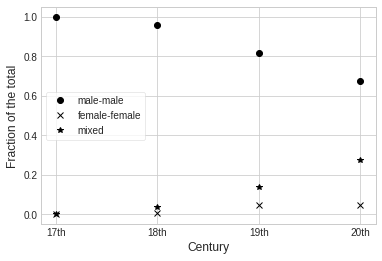

In [236]:
plt.xlabel('Century')
plt.ylabel('Fraction of the total')
plt.plot(x, mm_s,'o', color='black',
            label = 'male-male')
plt.plot(x, ff_s,'x', color='black',
             label = 'female-female')
plt.plot(x, mixed_s, '*', color='black',
             label = 'mixed')
plt.legend(loc='center left', frameon=True)
plt.style.use('seaborn-whitegrid')
plt.show()

In [218]:
results.to_csv('results.csv')

from google.colab import drive
drive.mount('drive')
!cp results.csv "drive/My Drive/"

Mounted at drive
